# README

Tribolium Denoising experiment 

`train_data`

the corresponding low and high pairs of image patches (in python/numpy npz file format)

`test_data`

the test stacks used for the analysis. Each stack has 4 channels, corresponding to 3 low conditions (C1,C2,C3) and a GT condition. 


In [1]:
import numpy as np
from csbdeep.utils.plot_utils import plot_some
from matplotlib import pyplot as plt
import tifffile as tif

In [2]:
def npadrr_info(adrr: np.ndarray) -> None:
    print(f'shape: {adrr.shape}')
    print(f'dtype: {adrr.dtype}')

# 1. Train Data

In [3]:
train_path = './train_data/data_label.npz'
train_file = np.load(train_path)
print(train_file.files)

['X', 'Y']


### 1.1. LR
- 数量: 15500 x 16(z轴)
- 通道: 1
- 尺寸：64(X轴) x 64(Y轴)

In [4]:
train_lr = train_file['X']
npadrr_info(train_lr)

shape: (15500, 1, 16, 64, 64)
dtype: float32


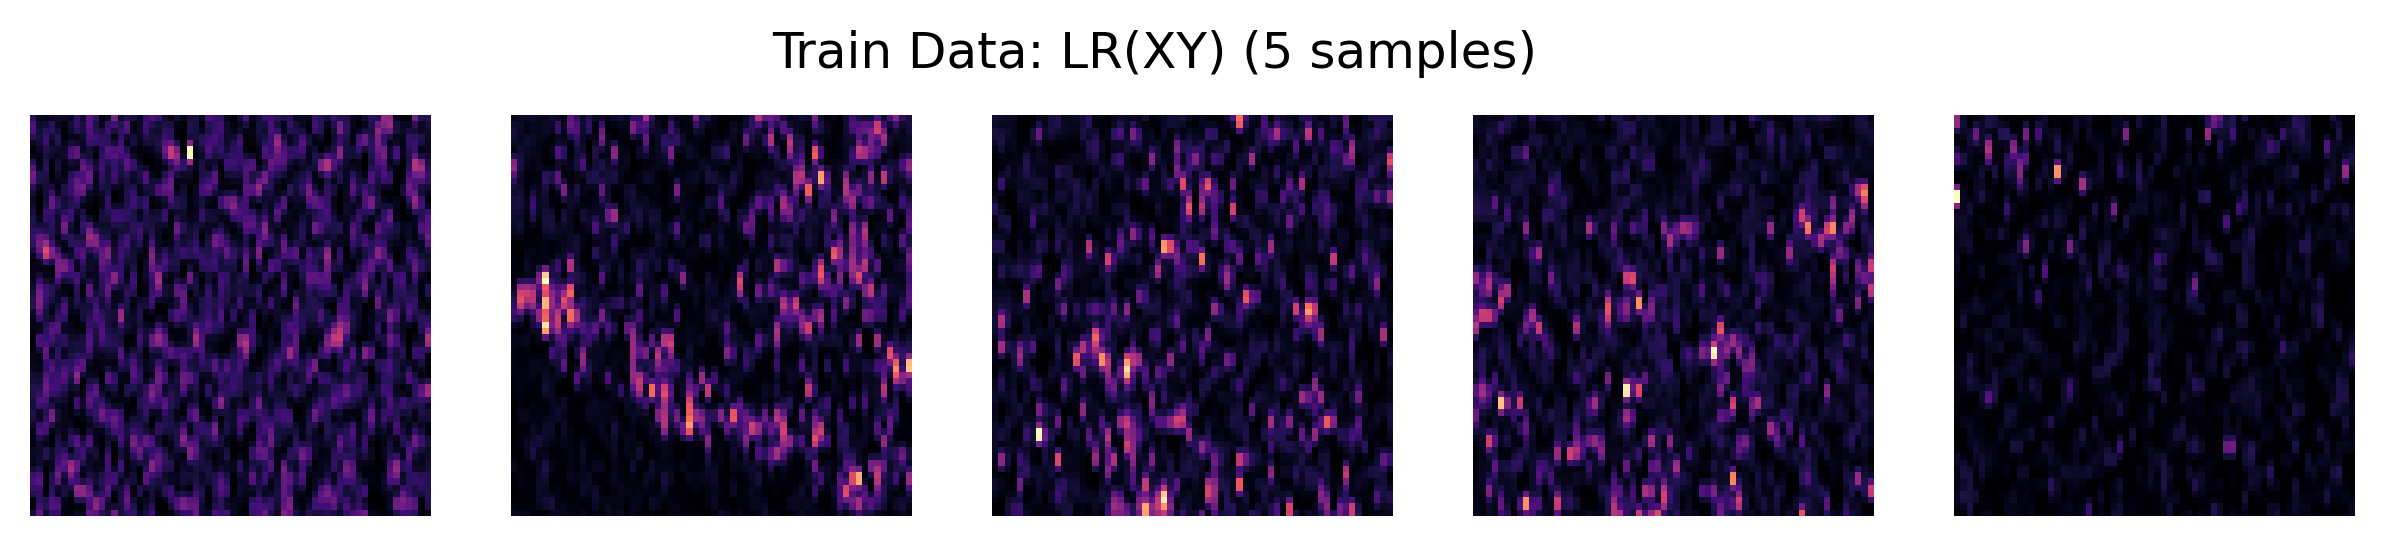

In [5]:
plt.figure(figsize=(10,2), dpi=300)
plt.suptitle('Train Data: LR(XY) (5 samples)')
plot_some(train_lr[0:5,0,8])
plt.show()

### 1.2. HR
- 数量: 15500 x 16(z轴)
- 通道: 1
- 尺寸：64(X轴) x 64(Y轴)

In [6]:
train_hr = train_file['Y']
npadrr_info(train_hr)

shape: (15500, 1, 16, 64, 64)
dtype: float32


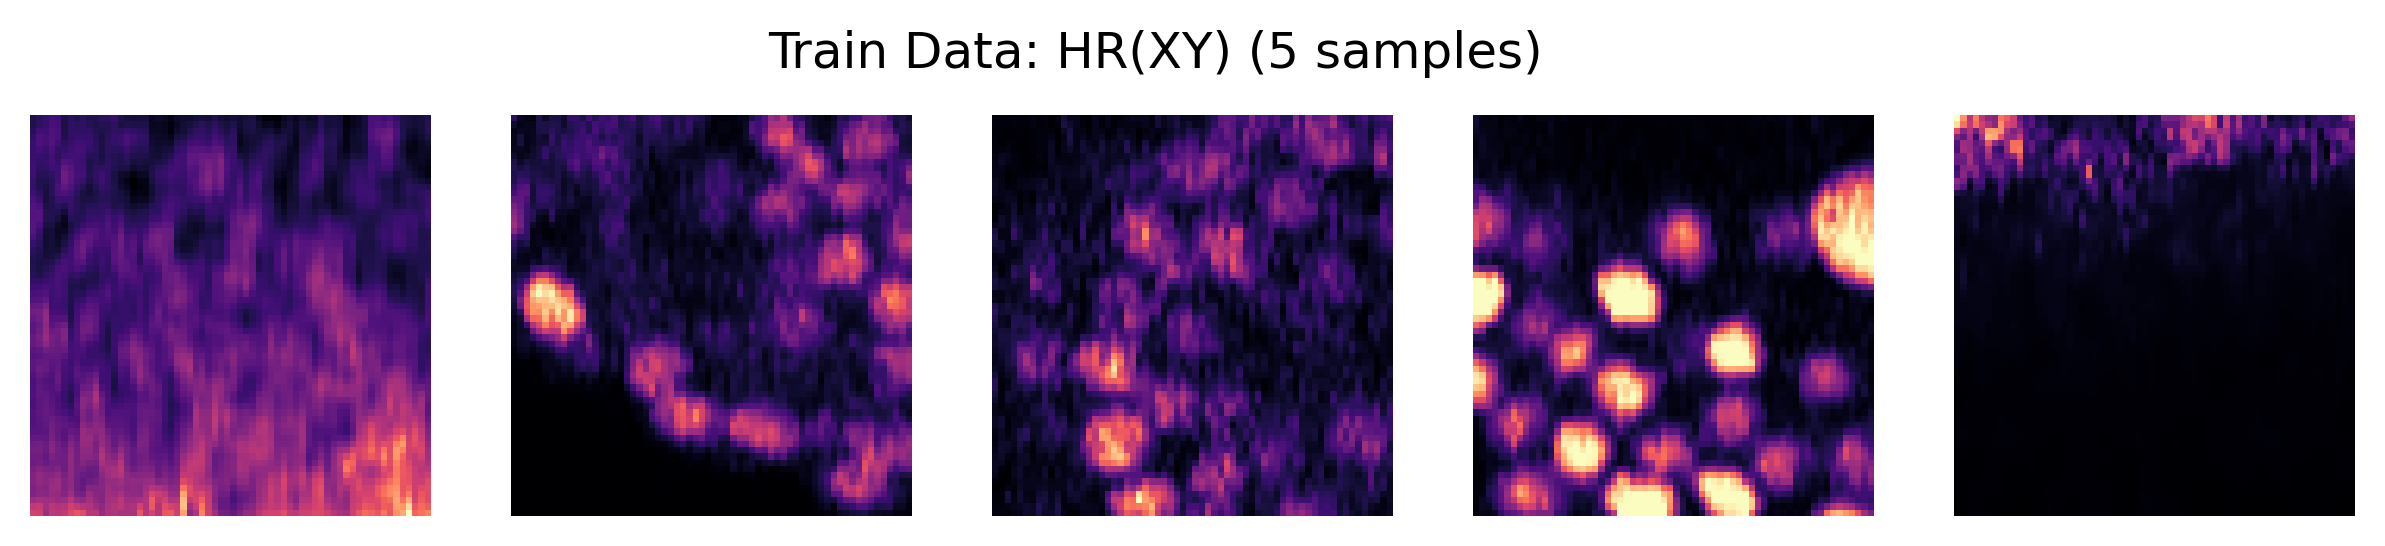

In [7]:
plt.figure(figsize=(10,2), dpi=300)
plt.suptitle('Train Data: HR(XY) (5 samples)')
plot_some(train_hr[0:5,0,8])
plt.show()

# 2. Test Set

In [8]:
test_path = './test_data/nGFP_0.1_0.2_0.5_20_07.tif'
# 3 low condition & 1 ground truth
test_file = tif.imread(test_path)
npadrr_info(test_file)

### 2.1. LR
- 数量: 41 x 3（low condition）
- 通道: 1
- 尺寸: 1015x626

In [9]:
test_lr = test_file[0:3]
npadrr_info(test_lr)

shape: (3, 41, 626, 1015)
dtype: uint16


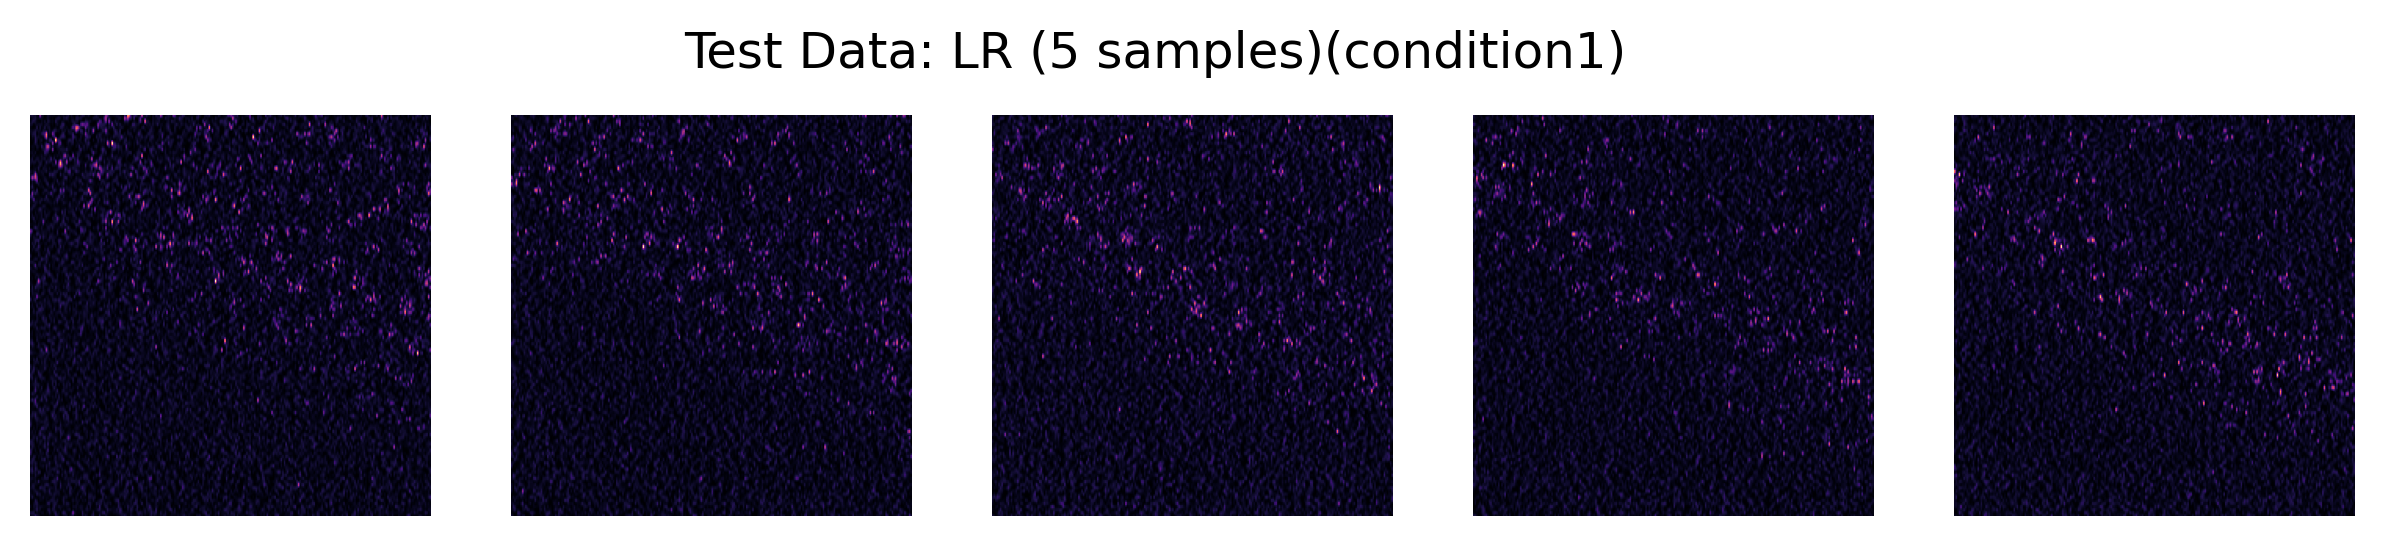

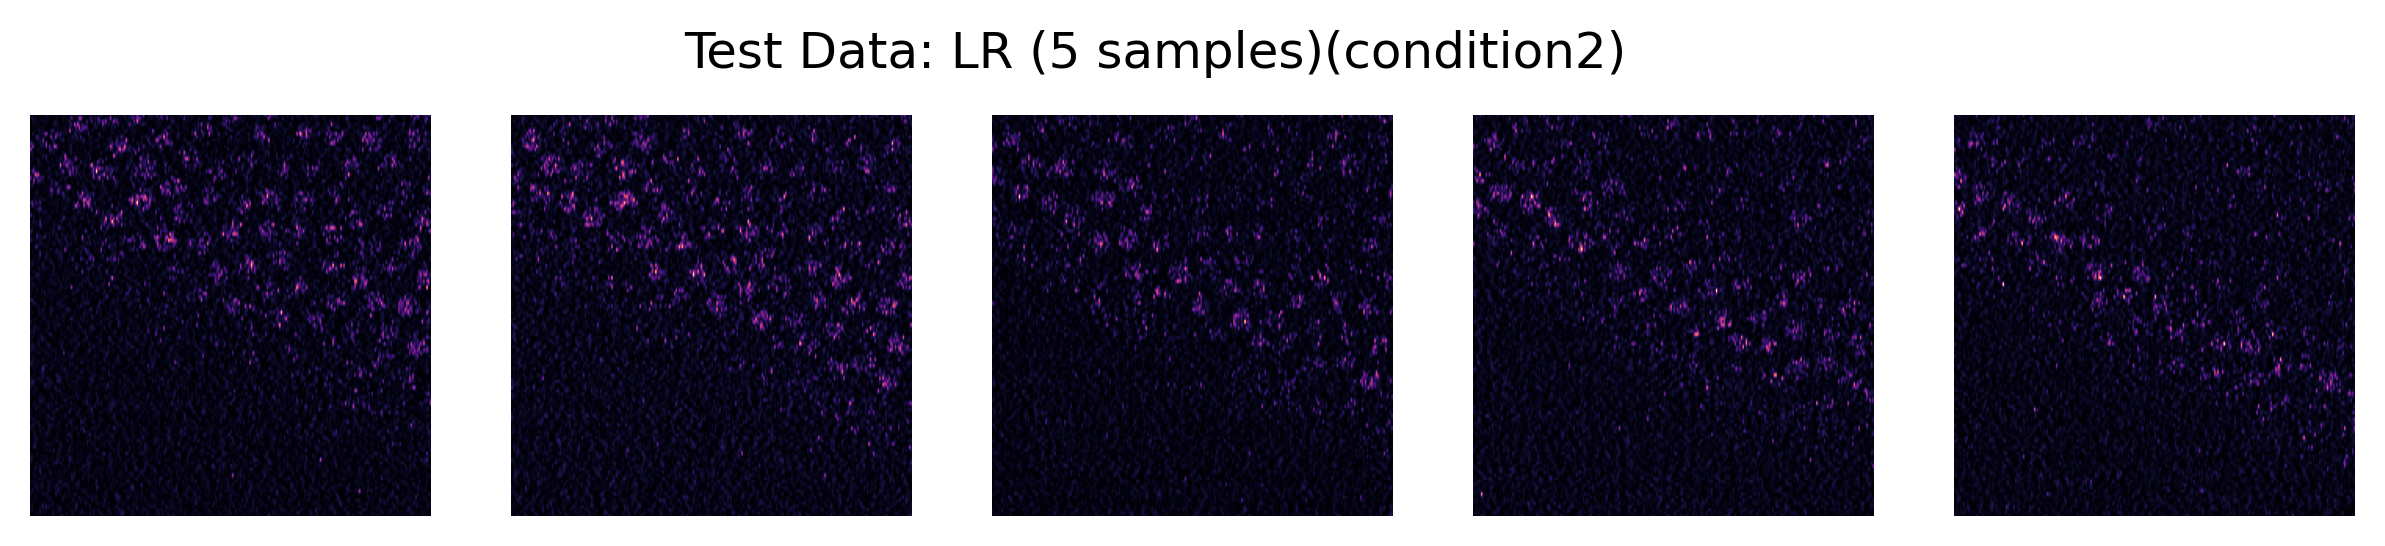

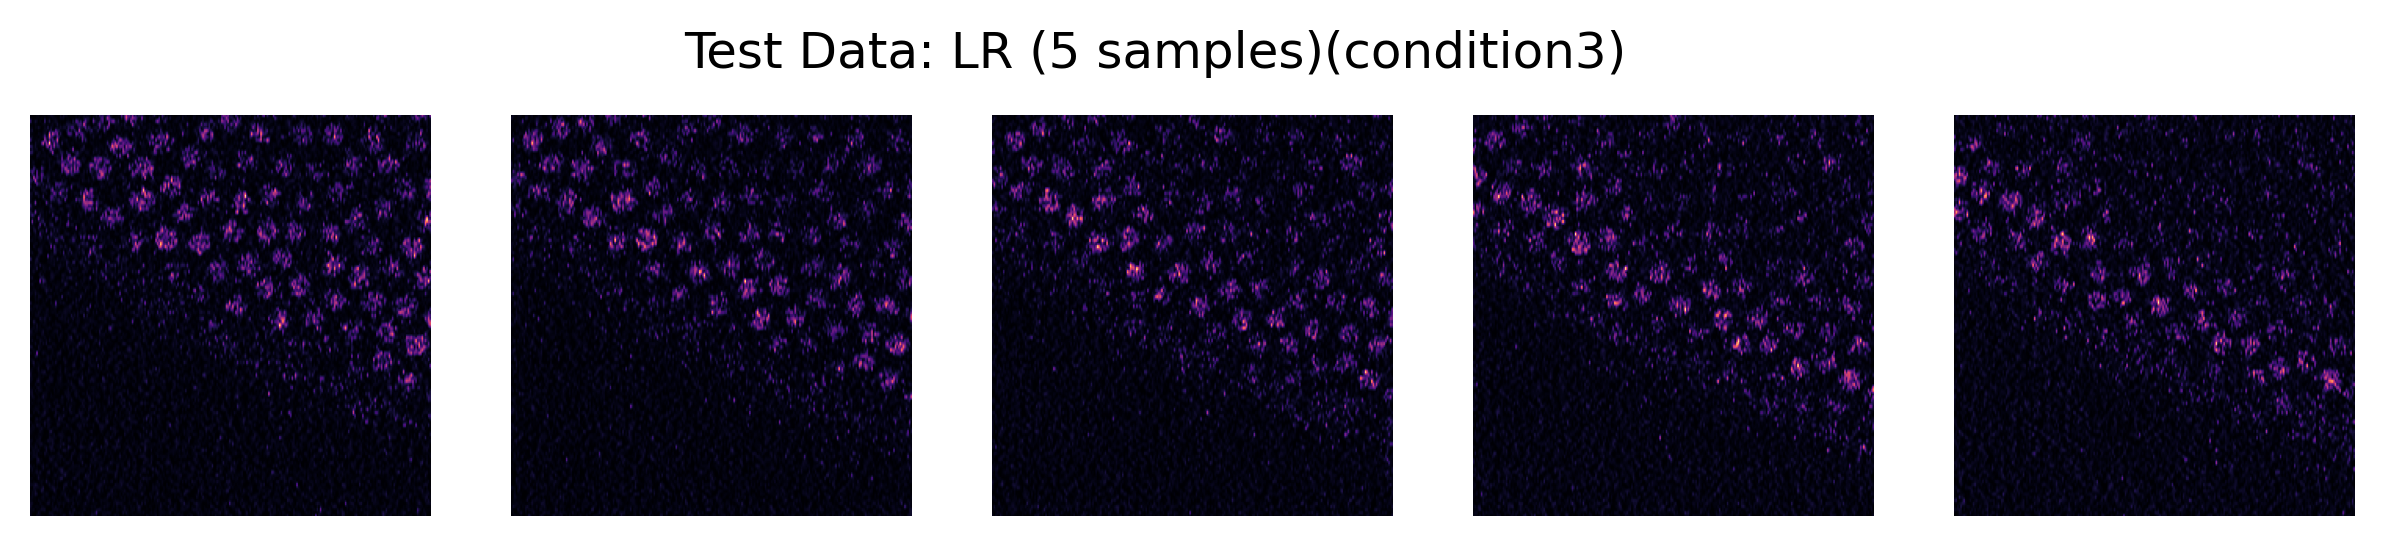

In [10]:
for i in range(3):
    plt.figure(figsize=(10,2), dpi=300)
    plt.suptitle(f'Test Data: LR (5 samples)(condition{i+1})')
    plot_some(test_lr[i][10:15,256:512,256:512])
    plt.show()

### 2.2. HR
- 数量: 41
- 通道: 1
- 尺寸: 1015x626

In [11]:
test_hr = test_file[3]
npadrr_info(test_hr)

shape: (41, 626, 1015)
dtype: uint16


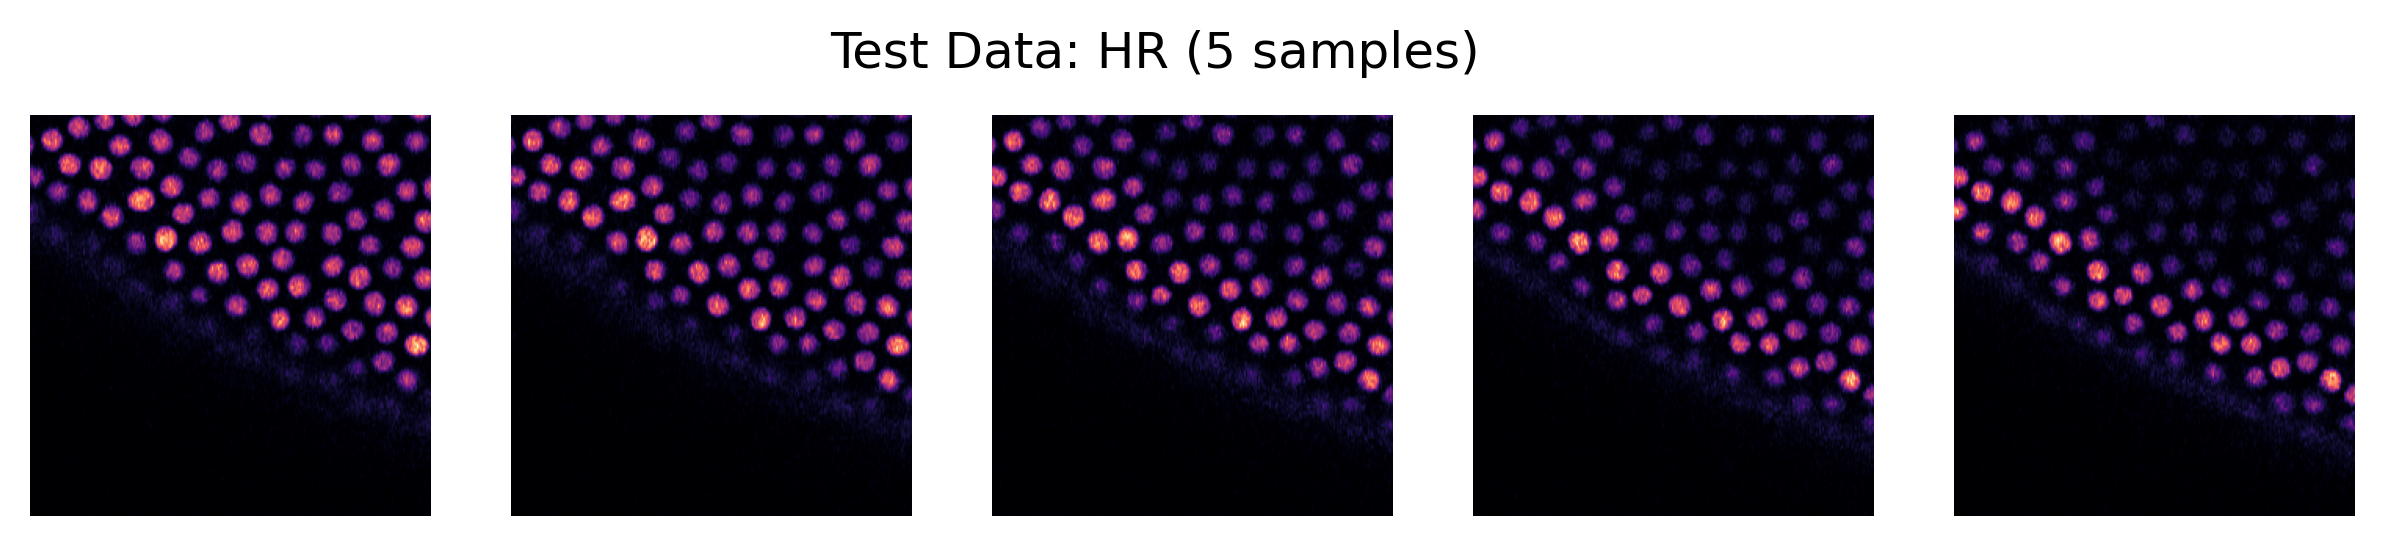

In [12]:
plt.figure(figsize=(10,2), dpi=300)
plt.suptitle('Test Data: HR (5 samples)')
plot_some(test_hr[10:15,256:512,256:512])
plt.show()